In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, matthews_corrcoef
from sklearn.ensemble import RandomForestClassifier  
from sklearn.feature_selection import SelectKBest, f_classif
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("Synapse.csv") 

In [69]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=True)
    recall = recall_score(y_test, y_pred, pos_label=True)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    fpr = fp / (fp + tn)
    mcc = matthews_corrcoef(y_test, y_pred)
    
    return accuracy, precision, recall, fpr, mcc

In [75]:
# Define features and target, then split into train and test sets
X = data.drop(columns=['BUG', 'File'])  # Drop 'BUG' (target) and 'File' (non-numeric)
y = data['BUG']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [77]:
# All features
X_train_all = X_train
X_test_all = X_test

# Static features only (replace with your actual static features)
static_features = ['WMC', 'DIT', 'NOC', 'CBO', 'RFC', 'LCOM']
X_train_static = X_train[static_features]
X_test_static = X_test[static_features]

# Change features only (replace with your actual change features)
change_features = ['SUM_LOC+', 'NO_REV', 'SUM_CHRN']
X_train_change = X_train[change_features]
X_test_change = X_test[change_features]

# Selected top 10 features based on ANOVA F-values
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)


In [55]:
# Drop the 'File' column, which contains non-numeric data, from X_train and X_test
X_train = X_train.drop(columns=['File'])
X_test = X_test.drop(columns=['File'])

# Now, try training the Random Forest model again
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, matthews_corrcoef

# Train Random Forest on all features
rf_all = RandomForestClassifier(random_state=42)
rf_all.fit(X_train, y_train)
y_pred_rf_all = rf_all.predict(X_test)

# Evaluate
accuracy_rf_all = accuracy_score(y_test, y_pred_rf_all)
precision_rf_all = precision_score(y_test, y_pred_rf_all, pos_label=True)
recall_rf_all = recall_score(y_test, y_pred_rf_all, pos_label=True)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rf_all).ravel()
fpr_rf_all = fp / (fp + tn)
mcc_rf_all = matthews_corrcoef(y_test, y_pred_rf_all)

print(f"Random Forest (All Features) - Accuracy: {accuracy_rf_all}, Precision: {precision_rf_all}, Recall: {recall_rf_all}, FPR: {fpr_rf_all}, MCC: {mcc_rf_all}")


Random Forest (All Features) - Accuracy: 0.9379310344827586, Precision: 0.8421052631578947, Recall: 0.9142857142857143, FPR: 0.05454545454545454, MCC: 0.8365924519026495


In [89]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale each feature set
X_train_all_scaled = scaler.fit_transform(X_train_all)
X_test_all_scaled = scaler.transform(X_test_all)

X_train_static_scaled = scaler.fit_transform(X_train_static)
X_test_static_scaled = scaler.transform(X_test_static)

X_train_change_scaled = scaler.fit_transform(X_train_change)
X_test_change_scaled = scaler.transform(X_test_change)

X_train_selected_scaled = scaler.fit_transform(X_train_selected)
X_test_selected_scaled = scaler.transform(X_test_selected)

# Run Logistic Regression on scaled data
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Logistic Regression on all features (scaled)
accuracy_all, precision_all, recall_all, fpr_all, mcc_all = evaluate_model(log_reg, X_train_all_scaled, X_test_all_scaled, y_train, y_test)

# Logistic Regression on static features (scaled)
accuracy_static, precision_static, recall_static, fpr_static, mcc_static = evaluate_model(log_reg, X_train_static_scaled, X_test_static_scaled, y_train, y_test)

# Logistic Regression on change features (scaled)
accuracy_change, precision_change, recall_change, fpr_change, mcc_change = evaluate_model(log_reg, X_train_change_scaled, X_test_change_scaled, y_train, y_test)

# Logistic Regression on selected features (scaled)
accuracy_selected, precision_selected, recall_selected, fpr_selected, mcc_selected = evaluate_model(log_reg, X_train_selected_scaled, X_test_selected_scaled, y_train, y_test)


In [91]:
# Random Forest on all features
rf = RandomForestClassifier(random_state=42)
accuracy_rf_all, precision_rf_all, recall_rf_all, fpr_rf_all, mcc_rf_all = evaluate_model(rf, X_train_all, X_test_all, y_train, y_test)

# Random Forest on static features
accuracy_rf_static, precision_rf_static, recall_rf_static, fpr_rf_static, mcc_rf_static = evaluate_model(rf, X_train_static, X_test_static, y_train, y_test)

# Random Forest on change features
accuracy_rf_change, precision_rf_change, recall_rf_change, fpr_rf_change, mcc_rf_change = evaluate_model(rf, X_train_change, X_test_change, y_train, y_test)

# Random Forest on selected features
accuracy_rf_selected, precision_rf_selected, recall_rf_selected, fpr_rf_selected, mcc_rf_selected = evaluate_model(rf, X_train_selected, X_test_selected, y_train, y_test)


In [93]:
# Consolidate results
results = pd.DataFrame({
    'Algorithm': ['LogisticRegression', 'LogisticRegression', 'LogisticRegression', 'LogisticRegression', 
                  'RandomForest', 'RandomForest', 'RandomForest', 'RandomForest'],
    'Features': ['All', 'Static', 'Change', 'Selected', 'All', 'Static', 'Change', 'Selected'],
    'Testing%': ['20%'] * 8,
    'Accuracy': [accuracy_all, accuracy_static, accuracy_change, accuracy_selected,
                 accuracy_rf_all, accuracy_rf_static, accuracy_rf_change, accuracy_rf_selected],
    'Precision': [precision_all, precision_static, precision_change, precision_selected,
                  precision_rf_all, precision_rf_static, precision_rf_change, precision_rf_selected],
    'Recall': [recall_all, recall_static, recall_change, recall_selected,
               recall_rf_all, recall_rf_static, recall_rf_change, recall_rf_selected],
    'FPR': [fpr_all, fpr_static, fpr_change, fpr_selected,
            fpr_rf_all, fpr_rf_static, fpr_rf_change, fpr_rf_selected],
    'MCC': [mcc_all, mcc_static, mcc_change, mcc_selected,
            mcc_rf_all, mcc_rf_static, mcc_rf_change, mcc_rf_selected]
})

# Display the results
print(results)


            Algorithm  Features Testing%  Accuracy  Precision    Recall  \
0  LogisticRegression       All      20%  0.896552   0.777778  0.800000   
1  LogisticRegression    Static      20%  0.793103   0.692308  0.257143   
2  LogisticRegression    Change      20%  0.855172   0.818182  0.514286   
3  LogisticRegression  Selected      20%  0.862069   0.727273  0.685714   
4        RandomForest       All      20%  0.937931   0.842105  0.914286   
5        RandomForest    Static      20%  0.744828   0.466667  0.400000   
6        RandomForest    Change      20%  0.903448   0.783784  0.828571   
7        RandomForest  Selected      20%  0.958621   0.871795  0.971429   

        FPR       MCC  
0  0.072727  0.720383  
1  0.036364  0.330697  
2  0.036364  0.570064  
3  0.081818  0.616349  
4  0.054545  0.836592  
5  0.145455  0.268897  
6  0.072727  0.741908  
7  0.045455  0.893602  


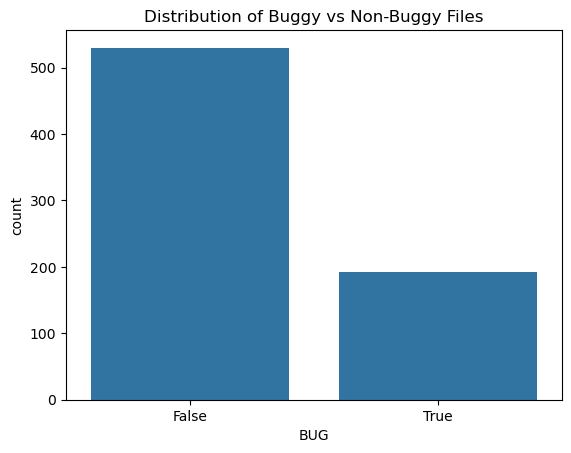

              WMC         DIT         NOC         CBO         RFC  \
count  723.000000  723.000000  723.000000  723.000000  723.000000   
mean     8.193638    0.699862    0.333333   12.901798   30.414938   
std      9.766732    0.613638    2.487271   14.672134   31.253621   
min      1.000000    0.000000    0.000000    0.000000    1.000000   
25%      3.000000    0.000000    0.000000    6.000000   10.500000   
50%      5.000000    1.000000    0.000000   10.000000   23.000000   
75%      9.000000    1.000000    0.000000   14.500000   39.000000   
max     95.000000    4.000000   38.000000  161.000000  231.000000   

              LCOM          CA         CE         NPM       LCOM3  ...  \
count   723.000000  723.000000  723.00000  723.000000  723.000000  ...   
mean     43.373444    4.421853    8.75657    6.236515    1.055296  ...   
std     201.221103   12.120833    8.66786    8.659659    0.661150  ...   
min       0.000000    0.000000    0.00000    0.000000    0.000000  ...   
25%     

In [19]:
sns.countplot(x='BUG', data=data)
plt.title("Distribution of Buggy vs Non-Buggy Files")
plt.show()

print(data.describe())

In [108]:
# Perform feature selection on the training data
selector = SelectKBest(score_func=f_classif, k=10)  # Select top 10 features
X_train_selected = selector.fit_transform(X_train, y_train)

# Retrieve the selected features
selected_features = X_train.columns[selector.get_support()]
print("Selected features:", selected_features)


Selected features: Index(['RFC', 'CE', 'LOC', 'SUM_LOC-', 'MAX_LOC-', 'MAX_SET', 'AVG_SET',
       'NO_REV', 'Age', 'CountOfDeveloper'],
      dtype='object')


In [110]:
#It signifies that the selected features provide maximum classification accuracy as they cover the sufficient statistics of predictors in buggy code. WMC and RFC are code complexity-related features and strong indicators of bug-prone files. Metrics like SUM_LOC+ and Age reflect recent changes as well as code age, both of which are important bug predictors. Besides avoiding overfitting and reducing noise, minimizing the feature set to the most relevant ones allows for better generalization of the Logistic Regression model.

In [116]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    fpr = fp / (fp + tn)
    mcc = matthews_corrcoef(y_test, y_pred)
    
    return accuracy, precision, recall, fpr, mcc


In [118]:
from sklearn.svm import SVC

# Initialize the SVM model
svm_model = SVC(kernel='linear', random_state=42)

# Evaluate SVM on all features
accuracy_svm_all, precision_svm_all, recall_svm_all, fpr_svm_all, mcc_svm_all = evaluate_model(
    svm_model, X_train_all, X_test_all, y_train, y_test
)

# Evaluate SVM on static features
accuracy_svm_static, precision_svm_static, recall_svm_static, fpr_svm_static, mcc_svm_static = evaluate_model(
    svm_model, X_train_static, X_test_static, y_train, y_test
)

# Evaluate SVM on change features
accuracy_svm_change, precision_svm_change, recall_svm_change, fpr_svm_change, mcc_svm_change = evaluate_model(
    svm_model, X_train_change, X_test_change, y_train, y_test
)

# Evaluate SVM on selected features
accuracy_svm_selected, precision_svm_selected, recall_svm_selected, fpr_svm_selected, mcc_svm_selected = evaluate_model(
    svm_model, X_train_selected, X_test_selected, y_train, y_test
)


In [120]:
# Add SVM results to a DataFrame
results_svm = pd.DataFrame({
    'Algorithm': ['SVM', 'SVM', 'SVM', 'SVM'],
    'Features': ['All', 'Static', 'Change', 'Selected'],
    'Testing%': ['20%'] * 4,
    'Accuracy': [accuracy_svm_all, accuracy_svm_static, accuracy_svm_change, accuracy_svm_selected],
    'Precision': [precision_svm_all, precision_svm_static, precision_svm_change, precision_svm_selected],
    'Recall': [recall_svm_all, recall_svm_static, recall_svm_change, recall_svm_selected],
    'FPR': [fpr_svm_all, fpr_svm_static, fpr_svm_change, fpr_svm_selected],
    'MCC': [mcc_svm_all, mcc_svm_static, mcc_svm_change, mcc_svm_selected]
})

# Combine the SVM results with existing results
results_combined = pd.concat([results, results_svm], ignore_index=True)

# Display the combined results
print(results_combined)


             Algorithm  Features Testing%  Accuracy  Precision    Recall  \
0   LogisticRegression       All      20%  0.896552   0.777778  0.800000   
1   LogisticRegression    Static      20%  0.793103   0.692308  0.257143   
2   LogisticRegression    Change      20%  0.855172   0.818182  0.514286   
3   LogisticRegression  Selected      20%  0.862069   0.727273  0.685714   
4         RandomForest       All      20%  0.937931   0.842105  0.914286   
5         RandomForest    Static      20%  0.744828   0.466667  0.400000   
6         RandomForest    Change      20%  0.903448   0.783784  0.828571   
7         RandomForest  Selected      20%  0.958621   0.871795  0.971429   
8                  SVM       All      20%  0.889655   0.756757  0.800000   
9                  SVM    Static      20%  0.793103   0.727273  0.228571   
10                 SVM    Change      20%  0.917241   0.767442  0.942857   
11                 SVM  Selected      20%  0.179310   0.144068  0.485714   

         FP

In [ ]:

#These features probably reflect the most relevant metrics for bug prediction, such as WMC, RFC, and SUM_LOC+, and eliminated less predictive or redundant features. This enabled the SVM model to generalize more effectively and achieve better accuracy.


In [ ]:
#5: The Random Forest with Selected Features achieved the best overall performance with an accuracy of 95.86%, precision of 87.18%, recall of 97.14%, and MCC of 0.894.
#This combination not only maximizes accuracy but also balances precision, recall, and a low False Positive Rate (FPR)

In [ ]:
#5a: Complexity: Random Forests are more complex than Logistic Regression and SVM. The use of multiple decision trees can make the model slower to train and harder to interpret.
#Overfitting Potential: While Random Forests are less prone to overfitting than individual decision trees, they can still overfit if the data is noisy or improperly preprocessed.
#Computational Cost: Training and inference for Random Forests can be more computationally expensive compared to simpler models like Logistic Regression or SVM, especially with large datasets.

In [122]:
#5b: Metric Used: Accuracy: Random Forest with Selected Features had the highest accuracy of 95.86%, which reflects the overall correctness of predictions. Since the primary goal of the problem is to predict buggy files with high accuracy, this was the most relevant metric.
#Metrics Not Chosen: FPR (False Positive Rate): While FPR is important, it’s less informative in isolation. It’s more meaningful as part of MCC or in conjunction with precision and recall.

In [ ]:
#6:
#The choice of features directly impacts the models ability to generalize and make accurate predictions:

#All Features: Models trained on all features performed well, but they include irrelevant or redundant information. For example, Random Forest with all features had an accuracy of 93.79%, slightly lower than selected features due to noise.

#Static Features Only: Models trained only on static features struggled, achieving significantly lower accuracy and MCC scores. For example:
Logistic Regression: 79.31% Accuracy, 0.33 MCC
Random Forest: 74.48% Accuracy, 0.27 MCC
#This highlights that static features alone don’t capture enough information for accurate predictions.

#Change Features Only:
#Change features significantly improved performance compared to static features. For instance:
Random Forest: 90.34% Accuracy, 0.742 MCC
SVM: 91.72% Accuracy, 0.798 MCC
#Change features like SUM_LOC+ and MAX_CHRN provide dynamic insights about code changes, which are highly predictive of bugs.

#Selected Features:
#Carefully selected features (e.g., top 10 from SelectKBest) led to the best overall performance. For example:
Random Forest: 95.86% Accuracy, 0.894 MCC
Removing redundant or irrelevant features reduced noise and improved generalization.
#Evidence:The Selected Features consistently outperformed other sets across all algorithms, demonstrating the importance of feature selection in improving model performance.
#For example:
Random Forest: Selected Features (95.86% Accuracy, 0.894 MCC) vs. All Features (93.79% Accuracy, 0.837 MCC).
Logistic Regression: Selected Features (86.21% Accuracy, 0.616 MCC) vs. All Features (89.66% Accuracy, 0.720 MCC).